<p align = "center">
<img src = '../docs/logo.png' height = "250">
</p>

# Trabalho - Conversão Eletromecânica


**Alunos:**
- André Vitor Cadena de Oliveira
- Fábio Augusto Almeida Marçal
- Gabriel Nazário Gonçalves
- Lorenzo Carrera de Oliveira
- Mateus Pincho de Oliveira

---

# Exercício 02

Considere o circuito magnético a seguir: 

<p align = "center">
<img src = '../docs/circuito_bobina.png' height = "350">
</p>

---

In [28]:
# Importando módulos...
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.misc import derivative
from scipy.interpolate import CubicSpline, interp1d # Interpolação spline
from scipy import integrate

# Lidando com os warnings dos plots
import warnings
warnings.filterwarnings('ignore')

## Importando dados da questão
---

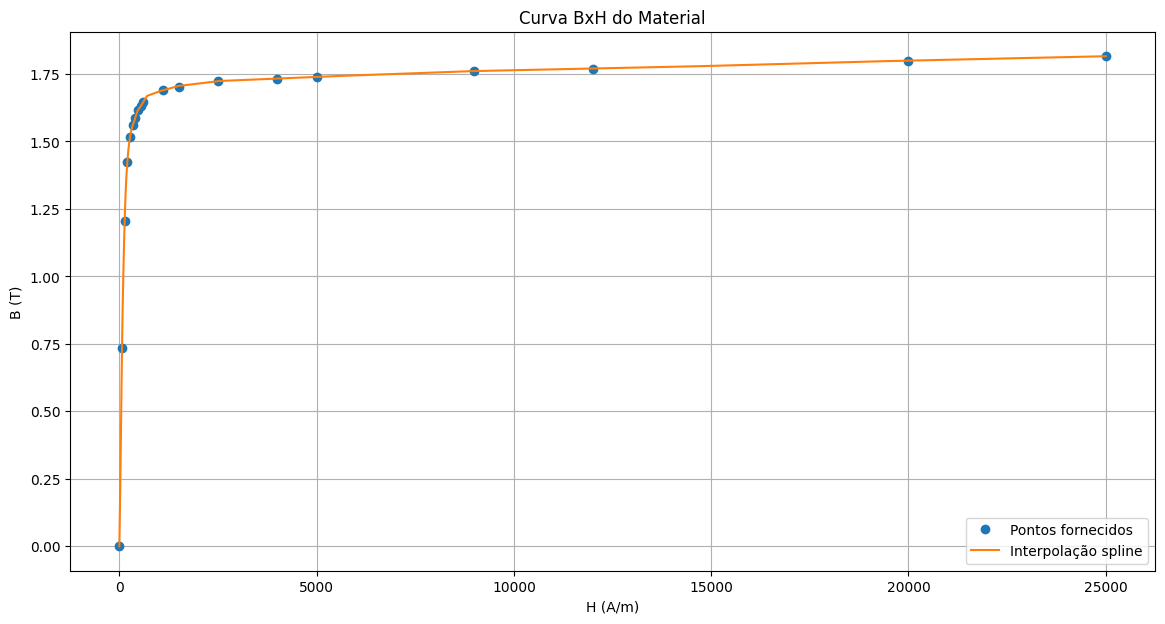

In [29]:
# Pontos fornecidos na tabela da página
H_amostra = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])  # Valores de H
B_amostra = np.array([0, 0.733, 1.205, 1.424, 1.517, 1.56, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703, 1.724, 1.731, 1.738, 1.761, 1.770, 1.8, 1.816])  # Valores de B

r = 6.3e-2         # Raio do rotor
D = 8e-2           # Comprimento do sistema
n = 90             # Número de espiras
lf = 75e-2         # Caminho do Ferro
g = 2*0.45e-3      # Comprimento do entreferro
u0 = np.pi * 4e-7  # Constante

# Interpolação dados
BxH_Real = interp1d( B_amostra, H_amostra, kind='cubic')

# Valores de H para os quais queremos interpolar B
n_amostras = 100
B_interp = np.linspace(0, np.max(B_amostra), n_amostras)
H_interp = BxH_Real(B_interp)

# Plotando o gráfico BxH
plt.figure(figsize=(14, 7))
plt.plot(H_amostra, B_amostra, 'o', label='Pontos fornecidos')
plt.plot(H_interp, B_interp, '-', label='Interpolação spline')
plt.xlabel('H (A/m)')
plt.ylabel('B (T)')
plt.title('Curva BxH do Material')
plt.legend()
plt.grid(True)
plt.show()

## Observações: 

1. Considere que exista um sensor de posição, de modo que a posição do rotor é sempre conhecida pelo sistema que controla a corrente dos enrolamentos;

2. Considere que a velocidade com a qual o sistema opera é suficientemente lenta de modo que o tempo necessário para a corrente sair de 0 até seu valor máximo pode ser desprezado.

3. Considere que o controlador deverá aplicada corrente em apenas uma bobina de cada vez.

---


## Item 01

Apresente um gráfico do fluxo concatenado na bobina 1 em função da corrente aplicada nessa bobina considerando a posição do rotor variando da posição -30° até +30 graus. Utilize um passo de 10 graus entre as curvas, de modo que, seu gráfico terá um total de 6 curvas.

---

In [30]:
# Posição do rotor variando de -30° a 30° com um passso de 10°
posicoes_theta = (np.radians(np.array([-29.9, -20, -10, 0, 10, 20, 29.9]))) #TODO Pq 29.9

# Área do ar varia conforme a posição
area_Ar = np.array([])

# Área do ferro não depende de theta
area_Ferro = D * r * (np.pi / 6) 
print(area_Ferro)

# Inicializando arrays vazios
fluxo_concatenado_ferro = np.empty((7,n_amostras))
B_ar = np.empty((7,n_amostras))
corrente_Real = np.empty((7,n_amostras))
corrente_Ideal = np.empty((7,n_amostras)) 

for posicao_theta in range(len(posicoes_theta)):
    #print("Para Theta igual a ", np.degrees(posicoes_theta[posicao_theta]), " graus")

    area_Ar = np.append(area_Ar, (D*r*((np.pi/6)-np.abs(posicoes_theta[posicao_theta]))))
    #print(area_Ar)

    for idx, i in enumerate(np.arange(0,1.816,0.01834)):  # TODO alterar valores do arange para variaveis como np.max(B_amostra)

        # Fluxo concatenado no ferro
        B_ar[posicao_theta][idx] = (i * area_Ferro) / area_Ar[posicao_theta]
        fluxo_concatenado_ferro[posicao_theta][idx] = n * area_Ar[posicao_theta] * B_ar[posicao_theta][idx]  # lambda = N x B x A

        corrente_Real[posicao_theta][idx] = (H_interp[idx] * lf + B_ar[posicao_theta][idx] * g / u0) / n
        corrente_Ideal[posicao_theta][idx] = (B_ar[posicao_theta][idx] * g / u0) / n

0.0026389378290154262


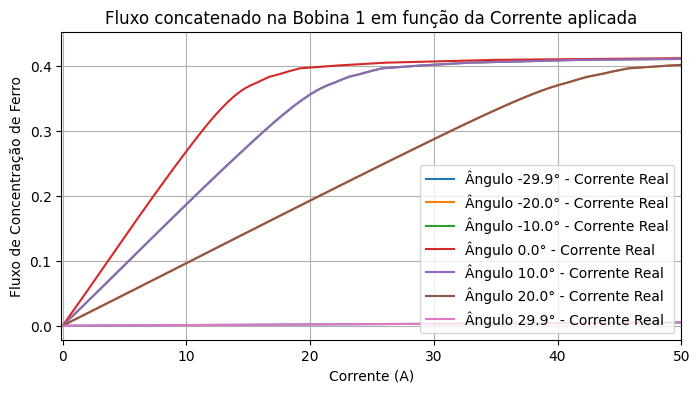

In [31]:
plt.figure(figsize=(8, 4))

# Para cada ângulo, plotamos o gráfico da corrente real
for j in range(7):
    plt.plot(corrente_Real[j], fluxo_concatenado_ferro[j], '-', label=f'Ângulo {np.degrees(posicoes_theta[j]):.1f}° - Corrente Real')

plt.xlabel('Corrente (A)')
plt.ylabel('Fluxo de Concentração de Ferro')
plt.xlim([-0.1,50])
plt.title('Fluxo concatenado na Bobina 1 em função da Corrente aplicada')
plt.legend()
plt.grid(True)
plt.show()

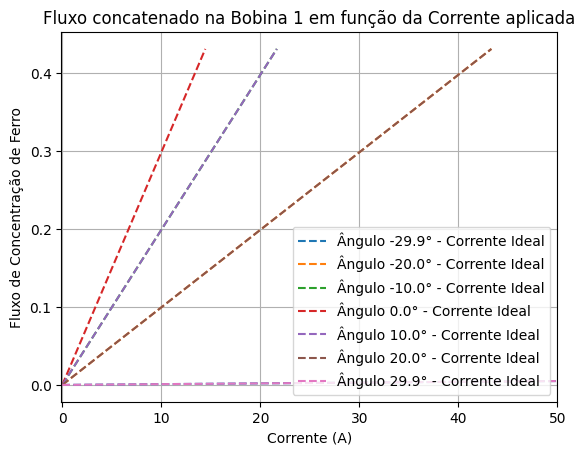

In [32]:
# Para cada ângulo, plotamos o gráfico da corrente ideal
for j in range(7):
    plt.plot(corrente_Ideal[j], fluxo_concatenado_ferro[j], '--', label=f'Ângulo {np.degrees(posicoes_theta[j]):.1f}° - Corrente Ideal')
    
plt.xlabel('Corrente (A)')
plt.ylabel('Fluxo de Concentração de Ferro')
plt.xlim([-0.1,50])
plt.title('Fluxo concatenado na Bobina 1 em função da Corrente aplicada')
plt.legend()
plt.grid(True)
plt.show()

## Item 02

Determine qual deve ser a corrente aplicada na bobina de modo a obter uma densidade de fluxo de 1,8 T quando o rotor estiver na posição zero graus.

---

In [33]:
H_max = BxH_Real(1.8)

I_max = (H_max*lf + ((1.8*area_Ferro)/(area_Ferro)/u0)*(g))/n

print(I_max)

180.99061154493725


## Item 03 e 04

Considerando que a corrente calculada no item anterior é aplicada na bobina 1:

- Apresente um gráfico do Torque produzido pela bobina 1 em função da posição do rotor considerando que o núcleo seja ideal;

- Apresente um gráfico do Torque produzido pela bobina 1 em função da posição do rotor considerando a característica real do núcleo

---

In [ ]:
# Semelhante à codigo de yan


## Item 05

Deseja-se que o sistema opere com uma velocidade constante de 100 RPM em sentido anti-horário. Descreva como o controlador deverá aplicar corrente nas bobinas de modo a alcançar essa velocidade.

---


## Resposta: 

In [34]:
rpm = 100

vps = rpm/60 #voltas por segundo.
t = 1/vps    #o tempo necessário pra dar uma volta.
ta = t/12    #o tempo de acionamento de cada fase, ta, é o tempo de uma volta dividido por cada passo de 30°
print("O tempo de acionamento da corrente de cada fase é de: " + str(round(ta*1000)) + " ms")

O tempo de acionamento da corrente de cada fase é de: 50 ms


## Item 06 e 07

Nessas condições determine a razão entre a potência mecânica desenvolvida pelo motor e a potência necessária para o sistema de acionamento, para quando: 

- O característica do núcleo é ideal

- A característica do núcleo é real